# Exercise 1: SLR Pulse Design


Welcome! This first exercise will cover the design of SLR pulses for MRI using Python. 

Documentation for all pulse design tools can be found [here](https://sigpy.readthedocs.io/en/latest/mri_rf.html).

Prior to beginning this exercise (and at the beginning of all additional exercise notebooks) we will need to import the packages we will use:


In [1]:
%matplotlib notebook

# typical sigpy and numpy imports
import numpy as np
import sigpy.mri.rf as rf # import for our RF pulse design tools 
import sigpy.plot as pl

## Problem 1a: design an inversion pulse

Large-tip inversion pulses cannot be effectively designed by the small-tip-angle approximation alone, and should instead be designed by iterative methods or the SLR method, which we will use here.

In SigPy, basic SLR pulses are designed using the [*sigpy.mri.rf.slr.dzrf*](https://sigpy.readthedocs.io/en/latest/generated/sigpy.mri.rf.slr.dzrf.html#sigpy.mri.rf.slr.dzrf) function, modeled after John Pauly's SLR design tools.

For this example, we want to design an inversion pulse with a sharp edge to invert magnetization(flip the sign of Mz).

* Using dzrf(), design an inversion pulse with a duration of 128 samples.
* To start, give your pulse 8 zero crossings. 
* Use a filter type that concentrates the pulse energy at the end of the pulse.
* Design the pulse to have at maximum 1% ripple in both the passband and the stopband.
* Plot the pulse using pl.LinePlot()

In [6]:
N = 128
tb = 8
d1 = 0.01
d2 = 0.01
ptype = 'inv'
ftype = 'min'

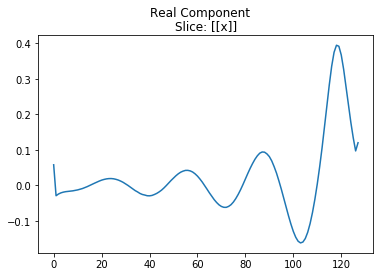

In [8]:
pulse = rf.slr.dzrf(N, tb, ptype, ftype, d1, d2)
pl.LinePlot(pulse, mode='r', title = 'Real Component')

## Problem 1b: simulate the inversion pulse's profile

* Simulate and plot the Mz profile created by this pulse.

This is done in 2 steps: 
* First, find get the a and b Cayley-Klein coefficients that correspond to the RF pulse using [*rf.sim.abrm()*](https://sigpy.readthedocs.io/en/latest/generated/sigpy.mri.rf.sim.abrm.html#sigpy.mri.rf.sim.abrm). You'll want to use spatial locations ranging from -2TB to 2TB. 
* Second, you need to make a conversion from the Cayley-Klein parameters to the magnetization response. For an inversion pulse (assuming M<sub>0</sub> is initially oriented entirely along M<sub>Z</sub>), the relationship for M<sub>Z</sub>'s final state is:

<center>M<sub>Z</sub> = M<sub>0</sub>(1 - 2|$\beta$|<sup>2</sup>)</center>

For this example you can just take M<sub>0</sub> = 1.

In [4]:
[a, b] = rf.sim.abrm(pulse, np.arange(-2*tb, 2*tb, 0.01), True)
Mz = 1-2*np.abs(b)**2

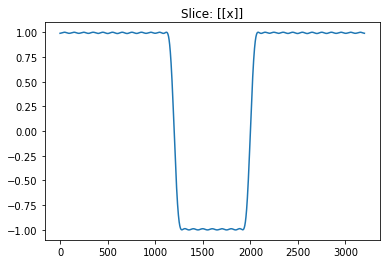

In [5]:
pl.LinePlot(Mz, mode='r')

If done correctly, you should see a profile of mainly 1's (uninverted magnetization) with a segment in the middle with a value of -1 (successfully inverted magnetization).

# Problem 1c: alter the time-bandwidth product

* Now, go back and rerun the code above, but change the time-bandwidth product to 4. Note the change in the inversion profile!
* While keeping the time-bandwidth product at four, change the design filter to a least-squares filter *'ls'* and re-plot the magnetization profile.
* Increase the allowable stopband ripple level to 25% while keeping the previous settings, and re-plot the magnetization profile.

# Problem 1d: root-flip the inversion pulse

For the final problem of exercise 1, we will explore the rf.mri.slr.dzrf() source code, and design a root-flipped SLR inversion pulse using what we find there. We can compare this to the standard SLR inversion pulse designed in 1a. *The slides from the educational session discussing the inside workings of dzrf() will be a helpful guide.*

Root flipping can be performed using the [*rf.slr.root_flip()*](https://sigpy.readthedocs.io/en/latest/generated/sigpy.mri.rf.slr.root_flip.html#sigpy.mri.rf.slr.root_flip) function. This function is used in the following fashion:

[pulse, bRootFlipped] = rf.slr.root_flip(b, d1, flip, tb)

To design the root flipped pulse, we will need b (the SLR b polynomial), d1 (the passband ripple level), flip (the flip angle of our pulse in radians) and tb (our time bandwidth product). All of these are knowns, aside from b.

**Your assignment is to write code to design b by extracting 4 lines of code from the [rf.slr.dzrf() source code](https://sigpy.readthedocs.io/en/latest/_modules/sigpy/mri/rf/slr.html#dzrf). Once this is done, root flip the pulse using root_flip().**

Step #1: You will want 1 line of code from dzrf() that calculates new filter ripples from the desired magnetization d1 and d2

Step #2: You will want 2 lines of code from dzrf() that design a minphase b.

Step #3: You will want to end with a 4th line of code from dzrf() that multiplies bsf by b.

Step #4: Once you have written these 4 lines of code to design b, use the root_flip() function to root flip the pulse. Plot its magnetization profile using the same code that you used in problem 1b!


In [ ]:
flip = np.pi # 180 degree inversion
d1 = 0.01 # our 1% ripples in pass and stop bands
d2 = 0.01
tb = 8 # time-bandwidth product of 8

In [ ]:
# code extracted from dzrf():
[bsf, d1, d2] = rf.slr.calc_ripples(ptype, d1, d2)
b = rf.slr.dzmp(N, tb, d1, d2)
b = b[::-1]
b = bsf*b

# root flipping the pulse, using the b polynomial
[pulse, bRootFlipped] = rf.slr.root_flip(b, d1, flip, tb)
pl.LinePlot(pulse)

In [ ]:
[a, b] = rf.sim.abrm(pulse, np.arange(-2*tb, 2*tb, 0.01), True)
Mz = 1-2*np.abs(b)**2

In [ ]:
pl.LinePlot(Mz, mode='r')